In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_render/nCoV_data_render.csv'
data = pd.read_csv(path)
data["Date"] = pd.to_datetime(data["Date"])
index_data = data.set_index(["Date"], drop=True)

# Check data
index_data.head(20)

,Total cases
Date,
2020-01-28,6061
2020-01-29,7816
2020-01-30,9821
2020-01-31,11948
2020-02-01,14551
2020-02-02,17387
2020-02-03,20047
2020-02-04,24553
2020-02-05,28276


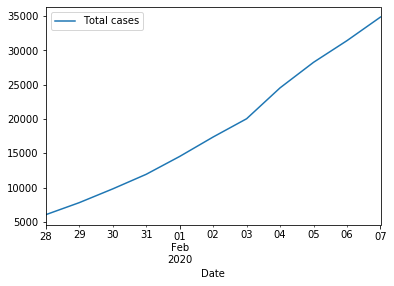

In [4]:
df = index_data[["Total cases"]]
df.plot()

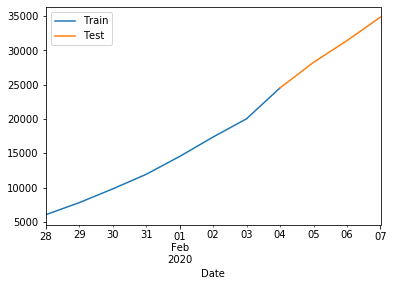

In [5]:
# Split date
split_date = pd.Timestamp('2020-02-04')
train = df.loc[:split_date]
test = df.loc[split_date:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['Train', 'Test'])

In [6]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

In [7]:
# Split data into x and y
X_train = train_scale[:-1]
y_train = train_scale[1:]

X_test = test_scale[:-1]
y_test = test_scale[1:]

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [47]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')
early_stop = EarlyStopping(monitor ='loss', patience=15, verbose=1)
history = model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/250
7/7 [==============================] - 0s 10ms/step - loss: 0.2646
Epoch 2/250
7/7 [==============================] - 0s 941us/step - loss: 0.2392
Epoch 3/250
7/7 [==============================] - 0s 902us/step - loss: 0.2153
Epoch 4/250
7/7 [==============================] - 0s 841us/step - loss: 0.1933
Epoch 5/250
7/7 [==============================] - 0s 851us/step - loss: 0.1730
Epoch 6/250
7/7 [==============================] - 0s 985us/step - loss: 0.1545
Epoch 7/250
7/7 [==============================] - 0s 929us/step - loss: 0.1375
Epoch 8/250
7/7 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 9/250
7/7 [==============================] - 0s 942us/step - loss: 0.1087
Epoch 10/250
7/7 [==============================] - 0s 944us/step - loss: 0.0964
Epoch 11/250
7/7 [==============================] - 0s 885us/step - loss: 0.0856
Epoch 12/250
7/7 [==============================] - 0s 1ms/step - loss: 0.0759
Epoch 13/250
7/7 [========================

7/7 [==============================] - 0s 705us/step - loss: 0.0038
Epoch 103/250
7/7 [==============================] - 0s 837us/step - loss: 0.0037
Epoch 104/250
7/7 [==============================] - 0s 791us/step - loss: 0.0035
Epoch 105/250
7/7 [==============================] - 0s 776us/step - loss: 0.0034
Epoch 106/250
7/7 [==============================] - 0s 857us/step - loss: 0.0033
Epoch 107/250
7/7 [==============================] - 0s 780us/step - loss: 0.0032
Epoch 108/250
7/7 [==============================] - 0s 846us/step - loss: 0.0031
Epoch 109/250
7/7 [==============================] - 0s 732us/step - loss: 0.0030
Epoch 110/250
7/7 [==============================] - 0s 742us/step - loss: 0.0029
Epoch 111/250
7/7 [==============================] - 0s 815us/step - loss: 0.0028
Epoch 112/250
7/7 [==============================] - 0s 686us/step - loss: 0.0027
Epoch 113/250
7/7 [==============================] - 0s 856us/step - loss: 0.0026
Epoch 114/250
7/7 [===========

7/7 [==============================] - 0s 778us/step - loss: 4.6698e-04
Epoch 200/250
7/7 [==============================] - 0s 698us/step - loss: 4.6599e-04
Epoch 201/250
7/7 [==============================] - 0s 714us/step - loss: 4.6507e-04
Epoch 202/250
7/7 [==============================] - 0s 790us/step - loss: 4.6422e-04
Epoch 203/250
7/7 [==============================] - 0s 717us/step - loss: 4.6343e-04
Epoch 204/250
7/7 [==============================] - 0s 902us/step - loss: 4.6270e-04
Epoch 205/250
7/7 [==============================] - 0s 695us/step - loss: 4.6202e-04
Epoch 206/250
7/7 [==============================] - 0s 754us/step - loss: 4.6140e-04
Epoch 207/250
7/7 [==============================] - 0s 848us/step - loss: 4.6082e-04
Epoch 208/250
7/7 [==============================] - 0s 664us/step - loss: 4.6028e-04
Epoch 209/250
7/7 [==============================] - 0s 785us/step - loss: 4.5978e-04
Epoch 210/250
7/7 [==============================] - 0s 814us/step -

In [48]:
# Prediction
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)

In [49]:
# Save model
model.save('ANN_nCoV.h5')

In [50]:
model_ann = load_model('ANN_nCoV.h5')
y_pred_test_ANN = model_ann.predict(X_test)

In [51]:
# Save data
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN Prediction'])
col3 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])

results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('ANN_Result.csv')

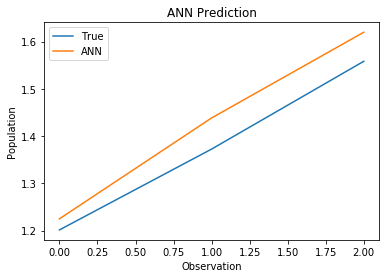

In [52]:
# Graphing
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN Prediction")
plt.xlabel('Observation')
plt.ylabel('Population')
plt.legend()
plt.show()

In [53]:
# R2 score
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# MAPE
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

In [54]:
from sklearn.metrics import r2_score
# Scoring
score_ann = model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

# MAPE 
print("MAPE score is: " + str(MAPE(y_test, y_pred_test_ANN)))

# R2 Scores
print("The R2 score on the Train set is:\t{:0.9f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.9f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.9f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.9f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

3/3 [==============================] - 0s 4ms/step
ANN: 0.002888
MAPE score is: 3.5646944605856814
The R2 score on the Train set is:	0.994883745
The Adjusted R2 score on the Train set is:	0.993860494

The R2 score on the Test set is:	0.863999749
The Adjusted R2 score on the Test set is:	0.727999498
